In [16]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Gather data

We're going to gather data from 3 sources:
- Local csv file (twitter-archive-enhanced.csv)
- [Tweet image predictions](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) hosted on Udacity servers as tsv file
- Twitter API


## Gather local CSV

In [17]:
tweets_original = pd.read_csv('twitter-archive-enhanced.csv')
tweets_original.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
tweets_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Gather image_predictions.tsv

In [19]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')


In [20]:
filename = 'image_predictions.tsv' 
with open(filename, 'wb') as file:
    file.write(response.content)

In [21]:
predictions_original = pd.read_csv(filename, sep='\t')

In [22]:
predictions_original.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Gather data from Twitter

**Note for Udacity**: I was interchanging emails with Twitter to open the developer account but I gave up after a week.

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweets_original.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440:

### Read tweet-json.txt and take it to a dataframe

In [23]:
tweet_list = []
with open('tweet-json.txt', 'rt') as file:        
    while True:
        line = file.readline()
        if not line:
            break
        # print(line)
        entry = json.loads(line)
        tweet_list.append(entry)
            
tweet_statuses_original = pd.DataFrame(tweet_list)
tweet_statuses_original.to_csv('twitter_archive_enhanced.csv', index=False)

tweet_statuses_original.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [24]:
# Grab only the needed columns

tweet_statuses = pd.DataFrame(tweet_list, columns=['id', 'favorite_count', 'retweet_count'])
tweet_statuses.columns = ['tweet_id', 'favorite_count', 'retweet_count']

tweet_statuses.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# Assess data

In [25]:
tweets_original.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [26]:
# Check if there are duplicate rows besides tweet_id, timestamp and text
columns = tweets_original.columns.tolist().copy()
columns.remove('tweet_id')
columns.remove('timestamp')
columns.remove('text')
tweets_original[columns].duplicated().sum()


0

In [27]:
# Check rating min/max values
tweets_original[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


We can see that there are too big numerators and denominators.

In [28]:
tweets_original.query('rating_denominator == 0') #.text.tolist()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [29]:
tweets_original.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [30]:
# Check if there are tweets without text
tweets_original[tweets_original.text.str.strip().str.len() == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
# Check if there can be multiple dog types
multiple_dog_type_mask = ((tweets_original.doggo == 'doggo').astype(int)
+ (tweets_original.floofer == 'floofer').astype(int)
+ (tweets_original.pupper == 'pupper').astype(int)
+ (tweets_original.puppo == 'puppo').astype(int) > 1)
print('Dogs with more than 1 type: ', tweets_original[multiple_dog_type_mask].shape[0])
tweets_original[multiple_dog_type_mask].sample(5)

Dogs with more than 1 type:  14


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [32]:
texts = tweets_original[multiple_dog_type_mask].text
texts.tolist()[:5]


["Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel",
 "At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",
 'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7',
 'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho',
 'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze']

In [33]:
# Dogs with 'None' as name
tweets_original.query("name == 'None'").shape[0]

745

In [34]:
# Check if there are uncapitalized names
tweets_original[tweets_original.name.str[0] != tweets_original.name.str.title().str[0]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


Hmm these are invalid names

In [35]:
predictions_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
predictions_original.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [37]:
# Check the tweets that don't have any prediction as dog

predictions_original.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [38]:
predictions_original.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [39]:
predictions_original.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [40]:
predictions_original.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [41]:
predictions_original.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [42]:
predictions_original.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [43]:
predictions_original.duplicated().sum()

0

In [44]:
# Check if there are tweets without images
print(tweets_original.shape[0])
tweets_original.merge(predictions_original, on=['tweet_id']).shape[0]

2356


2075

In [45]:
# Check if there are images without tweets
print(predictions_original.shape[0])
predictions_original.merge(tweets_original)[predictions_original.columns].shape[0]

2075


2075

In [46]:
tweets_original.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [47]:
root_tweets = tweets_original.query('in_reply_to_user_id != in_reply_to_user_id and retweeted_status_user_id != retweeted_status_user_id')
print(root_tweets.shape[0])
root_tweets.merge(predictions_original, on=['tweet_id']).shape[0]

2097


1971

In [48]:
tweet_statuses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Tidiness issues
T1) predictions.jpg_url and predictions.img_num belong to the "tweet" observational unit  
T2) Predictions table is not tidy. 9 columns for 3 variables (p, p_conf, p_dog)  
T3) Several urls per tweet in column 'expanded_urls'  
T4) Number of likes and retweets belong to to the "tweet" observational unit  

## Quality issues
Tweets table
1. doggo, floofer, pupper, puppo columns should be boolean
2. Retweets/replies in dataset
3. Useless columns (in_repply_*, source, retweeted_*) after solving #2
4. Inaccurate scores (numerators and denominators)
5. Timestamp not in timestamp datatype
6. Dogs without names have the string 'None' as name
7. Dogs' names which are uncapitalized are wrong (not actual names)
- reply_* columns with datatype float instead of int/string (Won't fix)
- retweeted_* columns with datatype float instead of int/string (Won't fix)
- Not all are dog ratings (Won't fix)

Predictions table
8. Not all tweets have images
- Not all images are from dogs (Won't fix)



# Cleaning

In [49]:
tweets = tweets_original.copy()
predictions = predictions_original.copy()

## Tidiness issues

### T1. predictions.jpg_url and predictions.img_num belong to the "tweet" observational unit  
#### Add the jpg_url and img_num fields to tweets table through an inner join (because we are only interested in tweets with images) 


#### Code

In [50]:
columns_to_move = ['jpg_url', 'img_num']
new_tweets_columns = tweets.columns.tolist() + columns_to_move

# Add the columns to tweets table
tweets = tweets.merge(predictions, how='inner', on='tweet_id', suffixes=('', '_pred'))[new_tweets_columns]

# Remove same columns from predictions
predictions = predictions.drop(columns=columns_to_move)

#### Test

In [51]:
tweets.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num
1042,711652651650457602,NaN,NaN,2016-03-20 20:36:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He just wanted to say hi. 9/10 v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711652651...,9,10,Gary,None,None,None,None,https://pbs.twimg.com/media/CeBMT6-WIAA7Qqf.jpg,1


In [52]:
predictions.sample()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
713,685325112850124800,golden_retriever,0.586937,True,Labrador_retriever,0.39826,True,kuvasz,0.00541,True


### T2. Predictions table is not tidy. 9 columns for 3 variables (p, p_conf, p_dog)
#### Define
Melt this table to have 3x rows. p, p_conf, p_dog will be the new columns. 3 melts will be needed (p, p_conf, p_dog)

#### Code

In [53]:
print('Original size: ', predictions.shape[0])

Original size:  2075


In [54]:
# Melt p1, p2, p3

pred_n = predictions.melt(id_vars='tweet_id', var_name='n', value_vars=['p1', 'p2', 'p3'], value_name='pred')
pred_n.n = pred_n.n.str.extract(r'(\d)').astype(int)
print(pred_n.shape[0])
pred_n.sample(5)


6225


,tweet_id,n,pred
1649,809084759137812480,1,vizsla
864,697270446429966336,1,toy_poodle
599,679729593985699840,1,wallaby
3192,725786712245440512,2,Samoyed
4799,681891461017812993,3,toy_terrier


In [55]:
# Melt p1_conf, p2_conf, p3_conf

pred_conf = predictions.melt(id_vars='tweet_id', var_name='n', value_vars=['p1_conf', 'p2_conf', 'p3_conf'], value_name='conf')
pred_conf.n = pred_conf.n.str.extract(r'(\d)').astype(int)
print(pred_conf.shape[0])
#pred_conf.sample(5)

pred_n.merge(pred_conf).sample(5)

6225


,tweet_id,n,pred,conf
4938,690400367696297985,3,Shetland_sheepdog,0.077616
2820,687494652870668288,2,miniature_pinscher,0.273595
191,669564461267722241,1,toy_poodle,0.623685
4848,684567543613382656,3,seat_belt,0.209393
6148,875144289856114688,3,dingo,0.160753


In [56]:
# Melt p1_dog, p2_dog, p3_dog

pred_dog = predictions.melt(id_vars='tweet_id', var_name='n', value_vars=['p1_dog', 'p2_dog', 'p3_dog'], value_name='is_dog')
pred_dog.n = pred_dog.n.str.extract(r'(\d)').astype(int)
#pred_p_dog

predictions = pred_n.merge(pred_conf).merge(pred_dog)
predictions.sample(5)


,tweet_id,n,pred,conf,is_dog
1792,830956169170665475,1,kuvasz,0.451516,True
860,696900204696625153,1,Chihuahua,0.297735,True
966,706291001778950144,1,Border_terrier,0.587101,True
983,707411934438625280,1,Lakeland_terrier,0.738277,True
3366,751538714308972544,2,golden_retriever,0.210839,True


#### Test

In [57]:
# Each tweet should have 3 pred rows
predictions.sort_values(['tweet_id', 'n'], ascending=True).head(10)

,tweet_id,n,pred,conf,is_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True
2075,666020888022790149,2,collie,0.156665,True
4150,666020888022790149,3,Shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True
2076,666029285002620928,2,miniature_pinscher,0.074192,True
4151,666029285002620928,3,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,1,German_shepherd,0.596461,True
2077,666033412701032449,2,malinois,0.138584,True
4152,666033412701032449,3,bloodhound,0.116197,True
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True


### T3. Several urls per tweet in column 'expanded_urls'
#### Define
Split expanded_urls column by a comma and then create the corresponding rows (with melt) in a new table 'tweet_urls'

#### Code

In [58]:
tweets_with_urls = tweets[['tweet_id']].copy()
# There are up to 8 urls
tweets_with_urls[['url_1', 'url_2', 'url_3', 'url_4', 'url_5', 'url_6', 'url_7', 'url_8']] = tweets.expanded_urls.str.split(',', expand=True)
tweets_with_urls.head(10)


,tweet_id,url_1,url_2,url_3,url_4,url_5,url_6,url_7,url_8
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...,None,None,None,None,None,None,None
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...,None,None,None,None,None,None,None
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...,None,None,None,None,None,None,None
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...,None,None,None,None,None,None,None
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891327558...,None,None,None,None,None,None
5,891087950875897856,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,None,None,None
6,890971913173991426,https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913...,None,None,None,None,None,None
7,890729181411237888,https://twitter.com/dog_rates/status/890729181...,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,None,None
8,890609185150312448,https://twitter.com/dog_rates/status/890609185...,None,None,None,None,None,None,None
9,890240255349198849,https://twitter.com/dog_rates/status/890240255...,None,None,None,None,None,None,None


In [59]:
# Melt and remove null urls
tweet_urls = tweets_with_urls.melt('tweet_id', value_name='url')[['tweet_id', 'url']].query('url == url')
tweet_urls.url = tweet_urls.url.str.strip()
tweet_urls.sort_values('url').head(10)

,tweet_id,url
1058,709901256215666688,http://goo.gl/ArWZfi
312,826204788643753985,http://us.blastingnews.com/news/2017/01/kentuc...
276,831650051525054464,http://www.gofundme.com/bluethewhitehusky
6,890971913173991426,https://gofundme.com/ydvmve-surgery-for-jax
409,812503143955202048,https://m.facebook.com/story.php?story_fbid=18...
6489,832769181346996225,https://twitter.com/EmilieGambril/status/83276...
264,832769181346996225,https://twitter.com/EmilieGambril/status/83276...
2339,832769181346996225,https://twitter.com/EmilieGambril/status/83276...
4414,832769181346996225,https://twitter.com/EmilieGambril/status/83276...
239,837012587749474308,https://twitter.com/KennyFromDaBlok/status/837...


In [60]:
# Remove expanded_urls column from tweets table
tweets = tweets.drop(columns='expanded_urls')

#### Test

In [61]:
# Glance to new table
tweet_urls.sample(5)

,tweet_id,url
1690,673343217010679808,https://twitter.com/dog_rates/status/673343217...
2026,666826780179869698,https://twitter.com/dog_rates/status/666826780...
1378,684481074559381504,https://twitter.com/dog_rates/status/684481074...
621,776819012571455488,https://twitter.com/dog_rates/status/679828447...
426,808838249661788160,https://twitter.com/dog_rates/status/808838249...


In [62]:
# Check urls by tweet
tweet_urls.groupby('tweet_id').count().reset_index().sort_values('url', ascending=False).head(10)

,tweet_id,url
1718,819015337530290176,8
1510,786036967502913536,8
1417,771171053431250945,8
1717,819015331746349057,8
1636,806242860592926720,6
1571,794983741416415232,6
1742,822647212903690241,6
1755,824796380199809024,6
1727,820446719150292993,6
1453,776819012571455488,6


In [63]:
# Check if there are null urls
tweet_urls[tweet_urls.url.isnull()]

,tweet_id,url


In [64]:
# Check if expanded_url column has been removed
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 18 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 non-null object
img_num                       2075 

### T4. Number of likes and retweets belong to to the "tweet" observational unit   

#### Definition
Add the favorite_count and retweet_count fields to tweets table through an left join with tweet_statuses 


#### Code

In [65]:
# Add the columns to tweets table
tweets = tweets.merge(tweet_statuses, how='left')


#### Test

In [66]:
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,41048.0,9774.0


## Quality issues

### 1. doggo, floofer, pupper, puppo columns should be boolean
#### Define
If the cell matches the column name, set as True, else set as false

#### Code

In [67]:
tweets.doggo = tweets.doggo == 'doggo'
tweets.floofer = tweets.floofer == 'floofer'
tweets.pupper = tweets.pupper == 'pupper'
tweets.puppo = tweets.puppo == 'puppo'

#### Test

In [68]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 20 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null bool
floofer                       2075 non-null bool
pupper                        2075 non-null bool
puppo                         2075 non-null bool
jpg_url                       2075 non-null object
img_num                       2075 non-null

In [69]:
tweets.doggo.value_counts()

False    1995
True       80
Name: doggo, dtype: int64

In [70]:
tweets.floofer.value_counts()

False    2067
True        8
Name: floofer, dtype: int64

In [71]:
tweets.pupper.value_counts()

False    1853
True      222
Name: pupper, dtype: int64

In [72]:
tweets.puppo.value_counts()

False    2051
True       24
Name: puppo, dtype: int64

### 2. Retweets/replies in dataset
#### Define
Remove rows where in_reply_to_user_id or retweeted_status_user_id are not null

#### Code

In [73]:
tweets = tweets.query('in_reply_to_user_id != in_reply_to_user_id and retweeted_status_user_id != retweeted_status_user_id')

#### Test

In [74]:
tweets.query('in_reply_to_user_id == in_reply_to_user_id or retweeted_status_user_id == retweeted_status_user_id')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,favorite_count,retweet_count


### 3. Useless columns (in_repply_*, retweeted_*) after solving #2

#### Define
Drop columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

#### Code

In [75]:
tweets = tweets.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [76]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 15 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null bool
floofer               1971 non-null bool
pupper                1971 non-null bool
puppo                 1971 non-null bool
jpg_url               1971 non-null object
img_num               1971 non-null int64
favorite_count        1971 non-null float64
retweet_count         1971 non-null float64
dtypes: bool(4), float64(2), int64(4), object(5)
memory usage: 192.5+ KB


### 4. Inaccurate scores (numerators and denominators)
#### Define
Get numerator and denominator with a regex. Denominator has to be >= 10.
If there's no rating, remove entry

#### Code

In [77]:
import re
def get_rating(row):
    ratings = re.findall(r"(\d+\/\d+)", row['text'])    
    for rating in ratings:
        numerator, denominator = rating.split('/')
        numerator, denominator = int(numerator), int(denominator)
        if denominator >= 10:
            return (numerator, denominator)
    return (None, None)  

tweets[['rating_numerator', 'rating_denominator']] = tweets.apply(get_rating, axis=1, result_type='expand')

#### Test

In [78]:
# Check which tweets have changed ratings (cleaned vs original) 
test_join = tweets.merge(tweets_original, on='tweet_id', suffixes=('_cln', '_org')).query('rating_numerator_cln != rating_numerator_org or rating_denominator_cln != rating_denominator_org')
test_join[['text_cln', 'rating_numerator_org', 'rating_denominator_org', 'rating_numerator_cln', 'rating_denominator_cln']]

,text_cln,rating_numerator_org,rating_denominator_org,rating_numerator_cln,rating_denominator_cln
382,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,NaN,NaN
1950,This is an Albanian 3 1/2 legged Episcopalian...,1,2,9.0,10.0


In [79]:
# Check full texts to verify cleaned version is correct
test_join.text_cln.tolist()

['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

### 5. Timestamp not with timestamp datatype
#### Define
Convert timestamp field from string to timestamp datatype

#### Code

In [80]:
tweets.timestamp = pd.to_datetime(tweets.timestamp)

#### Test

In [81]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 15 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1970 non-null float64
rating_denominator    1970 non-null float64
name                  1971 non-null object
doggo                 1971 non-null bool
floofer               1971 non-null bool
pupper                1971 non-null bool
puppo                 1971 non-null bool
jpg_url               1971 non-null object
img_num               1971 non-null int64
favorite_count        1971 non-null float64
retweet_count         1971 non-null float64
dtypes: bool(4), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 192.5+ KB


### 6. Dogs without names have the string 'None' as name
#### Define
Replace 'None' string by None value (NaN)

#### Code

In [82]:
tweets.name = tweets.name.replace('None', np.nan)

#### Test

In [83]:
tweets.query('name == "None"')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,favorite_count,retweet_count


In [84]:
#nan = np.nan
tweets.query('name != name').shape[0]

524

### 7. Dogs' names which are uncapitalized are wrong (not actual names)
#### Define
Set invalid names (not capitalized) as null (nan). Check just first letter

#### Code

In [85]:
mask_uncapitalized = tweets.name.str[0] != tweets.name.str.title().str[0]
tweets.loc[mask_uncapitalized, 'name'] = np.nan


#### Test

In [86]:
tweets[mask_uncapitalized]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,favorite_count,retweet_count
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,10.0,NaN,False,False,False,False,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,20562.0,3261.0
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13.0,10.0,NaN,False,False,False,False,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,56848.0,16716.0
12,889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13.0,10.0,NaN,False,False,False,True,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,38818.0,8538.0
22,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,14.0,10.0,NaN,False,False,False,False,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,46959.0,12082.0
24,887343217045368832,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,13.0,10.0,NaN,False,False,False,False,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,34222.0,10737.0
25,887101392804085760,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,12.0,10.0,NaN,False,False,False,False,https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg,1,31061.0,6167.0
34,885167619883638784,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,13.0,10.0,NaN,False,False,False,False,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,4,22367.0,4556.0
38,884441805382717440,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",14.0,10.0,NaN,False,False,False,False,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,27478.0,5856.0
43,883117836046086144,2017-07-07 00:17:54,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,13.0,10.0,NaN,False,False,False,False,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,37914.0,6949.0
51,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,14.0,10.0,NaN,False,False,True,False,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1,50199.0,16570.0


### 8. Not all tweets have images
#### Define
- Remove all the entries from tweets table that don't have a corresponding entry in predictions table. **Note: this was already fixed in Tidiness issue 1**

#### Test

In [87]:
assert(tweets.merge(predictions[['tweet_id']].drop_duplicates()).shape[0] == tweets.shape[0])



## Store cleaned data

In [88]:
# Store tweets table
tweets.to_csv('twitter_archive_master.csv', index=False)
# Store predictions table
predictions.to_csv('predictions_master.csv', index=False)
# Store tweet_urls table
tweet_urls.to_csv('tweet_urls_master.csv', index=False)

# Analyze (Insights)

Let's analyze the tweets.favorite_count variable

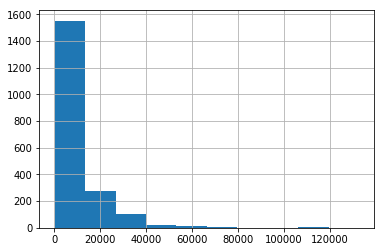

In [89]:
tweets.favorite_count.hist();

In [90]:
tweets.favorite_count.describe()

count      1971.000000
mean       8949.106545
std       12267.799790
min          81.000000
25%        1997.000000
50%        4147.000000
75%       11402.500000
max      132810.000000
Name: favorite_count, dtype: float64

It seems that log could be a useful transformation

In [91]:
np.log10(tweets.favorite_count).describe()

count    1971.000000
mean        3.634263
std         0.562125
min         1.908485
25%         3.300370
50%         3.617734
75%         4.057000
max         5.123231
Name: favorite_count, dtype: float64

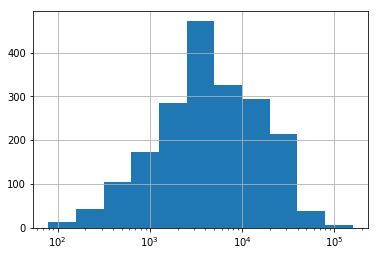

In [92]:
# Check distribution of favorite_count
bins = 10 ** np.arange(1.9, 5.2, 0.3)
tweets.favorite_count.hist(bins=bins)
plt.xscale('log')


**Insight**: The favorite_count variable seems to follow a log normal distribution. The mean favorite_count is 9k and the maximum around 130K

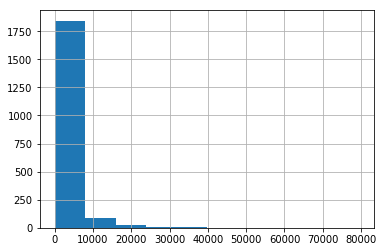

In [93]:
tweets.retweet_count.hist();

In [94]:
tweets.retweet_count.describe()

count     1971.000000
mean      2784.449518
std       4697.662893
min         16.000000
25%        628.500000
50%       1367.000000
75%       3239.000000
max      79515.000000
Name: retweet_count, dtype: float64

It seems that log could be a useful transformation

In [95]:
np.log10(tweets.retweet_count).describe()

count    1971.000000
mean        3.131725
std         0.538294
min         1.204120
25%         2.798305
50%         3.135769
75%         3.510411
max         4.900449
Name: retweet_count, dtype: float64

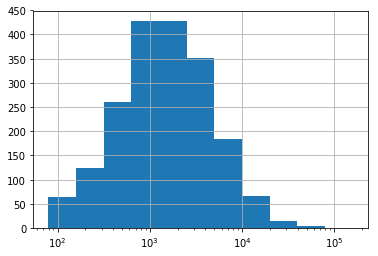

In [96]:
# Check distribution of favorite_count
bins = 10 ** np.arange(1.9, 5.2, 0.3)
tweets.retweet_count.hist(bins=bins)
plt.xscale('log')


**Insight**: The retweet_count variable also seems to follow a log normal distribution. The mean favorite_count is 9k and the maximum around 80K

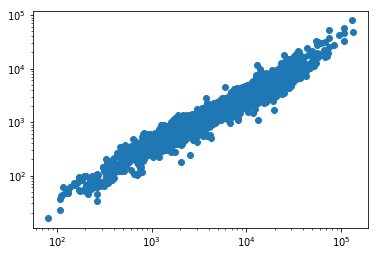

In [97]:
plt.scatter(x=tweets.favorite_count, y=tweets.retweet_count)
plt.xscale('log')
plt.yscale('log')

**Insight:** There's a strong correlation between retweet_count and favorite_count. The relation between the logarithm of these 2 variables is linear

In [98]:
tweets.rating_denominator.describe()

count    1970.000000
mean       10.483249
std         6.851911
min        10.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

Clearly there are outliers. Let's ignore them and plot

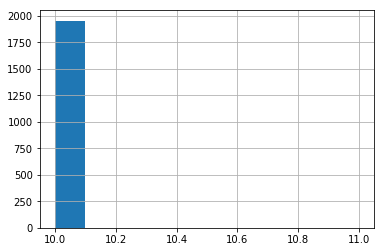

In [99]:
tweets.rating_denominator[tweets.rating_denominator < 15].hist();

**Insight:** Practically all the ratings equal to 10. The rest are outliers

In [100]:
tweets.rating_numerator.describe()

count    1970.000000
mean       12.221320
std        41.643054
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

Let's remove the outliers

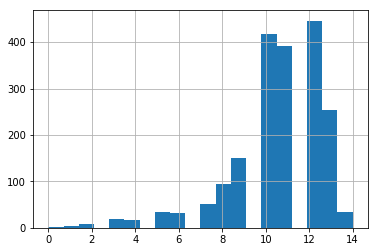

In [101]:
tweets.rating_numerator[tweets.rating_numerator <= 14].hist(bins=20);

**Insight:** The distribution of the scores is skewed to the left, with a mean of 12. The 25th percentile is 10 which means that 3/4 of the dogs have 10/10 or more points in the score.

Now let's analyze the predicted breeds

In [124]:
breed_freqs = predictions[predictions.is_dog].pred.value_counts()
breed_freqs.shape[0]

118

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

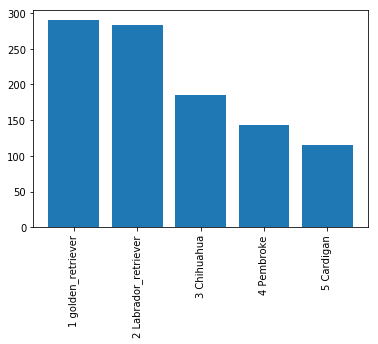

In [120]:
breed_freqs_top5 = breed_freqs.head(5)
labels = ['{} {}'.format(i+1, name) for i, name in enumerate(breed_freqs_top5.index)]
plt.bar(x=labels, height=breed_freqs_top5)
plt.xticks(rotation=90)

**Insight:** There are 118 distinct breeds predicted. The most frequent are the golden retriever and labrador retriever.